<a href="https://colab.research.google.com/github/sridevibonthu/APPLab/blob/main/Machine%20Learning/5_Logistic_Regression_on_Titanic_with_cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load the dataset
train = pd.read_csv("train.csv")


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

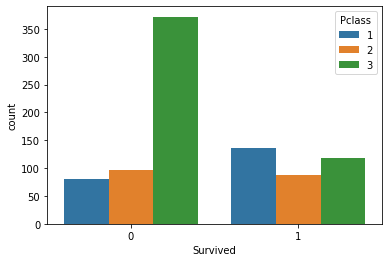

In [7]:
sns.countplot(x='Survived', hue='Pclass', data=train)


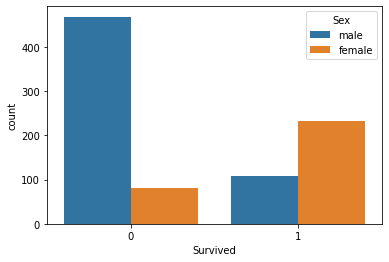

In [8]:
sns.countplot(x='Survived', hue='Sex', data=train)


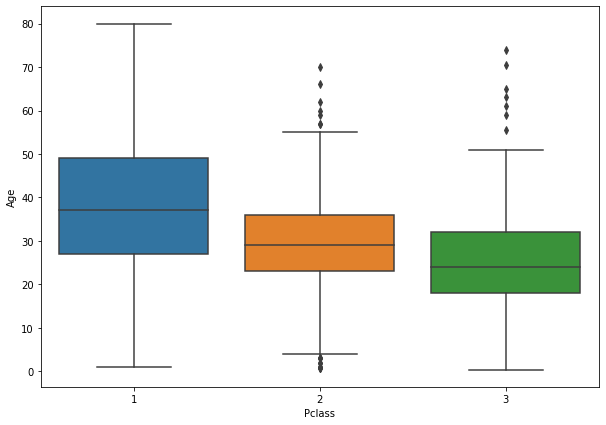

In [9]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [10]:
# impute average age values to null age values:
def add_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        return int(train[train["Pclass"] == Pclass]["Age"].mean())
    else:
        return Age

In [11]:
train["Age"] = train[["Age", "Pclass"]].apply(add_age,axis=1)


In [12]:
#We have lots of null values for Cabin column, so we just remove it.

train.drop("Cabin",inplace=True,axis=1)


In [13]:
# Finally, we remove some rows with null values:

train.dropna(inplace=True)


- Cleaning is done,
- Now, We are going to convert some categorical data into numeric. For example, the sex column.
- Let’s use the **get_dummies** function of Pandas. It will create two columns, one for male, one for female.

In [14]:
pd.get_dummies(train["Sex"])


,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [15]:
sex = pd.get_dummies(train["Sex"],drop_first=True)


In [16]:
embarked = pd.get_dummies(train["Embarked"],drop_first=True)
pclass = pd.get_dummies(train["Pclass"],drop_first=True)

In [17]:
#add these variables to the dataset
train = pd.concat([train,pclass,sex,embarked],axis=1)


In [18]:
#remove the columns which are not going to be useful for the model
train.drop(["PassengerId","Pclass","Name","Sex","Ticket","Embarked"],axis=1,inplace=True)


In [19]:
# X will contain all the features and y will contain the target variable

y = train["Survived"]
X = train.drop("Survived",axis=1)


In [20]:
# use train_test_split from cross_validation module to split our data. 70% of the data will be training data and %30 will be testing data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

### Train the model using Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
logmodel = LogisticRegression()  #define
cv_results = cross_val_score(logmodel, X_train, y_train, cv=5, scoring='accuracy')


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [22]:
print(cv_results)

[0.728      0.832      0.7983871  0.80645161 0.83064516]


In [23]:
print(cv_results.mean())

0.7990967741935484


### Accuracy

In [24]:
from sklearn.model_selection import cross_val_predict
predictions = cross_val_predict(logmodel, X_test, y_test, cv=5)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       163
           1       0.80      0.68      0.74       104

    accuracy                           0.81       267
   macro avg       0.81      0.79      0.79       267
weighted avg       0.81      0.81      0.81       267



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


### Confusion Matrix

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[145,  18],
       [ 33,  71]])

True positive: 150 (We predicted a positive result and it was positive)

True negative: 71 (We predicted a negative result and it was negative)

False positive: 13 (We predicted a positive result and it was negative)

False negative: 33 (We predicted a negative result and it was positive)